#### 1、感知机是什么？

##### 1.1、感知机的图形表示

![感知机的图形表示](./attachements/感知机的图形表示.png)

##### 1.2、感知机的函数表示

$$
y = \begin{cases}
 0 & (w_1x_1 + w_2x_2 \le \theta) \\
 1 & (w_1x_1 + w_2x_2 > \theta)
\end{cases}
$$

- 权重$w$: 权重是控制输入信号的重要性的参数，俗称加权
- 阈值$\theta$: 神经元被”激活“的阈值，后面会改为偏置$bias$("穿木屐"，偏置的值决定了神经元被激活的容易程度) 

##### 1.3、我理解的感知机总述

Perceptron的本质就是一个：接收多个输入，只有一个输出的线性、可叠加的阶跃函数！

- 注意，我这里说的只有一个输出是因为我们现在的单层感知机还没加激活函数，即：$z = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b$ 其中 $z$ 是**唯一的输出**，它代表将所有输入特征按照不同的权重加权求和，再加上偏置项。

- $z = f(w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b)$激活函数只是在最后对这个输出进行处理，但在没有激活函数的情况下，它仍然只有一个输出值。


#### 2、感知机怎么表示简单逻辑电路？

##### 2.1、与门

###### 2.1.1 真值表

> 全1才1

| $x_1$  | $x_2$ |  $y$ |
| ------ | ----- | -----|
| 0      |   0   |   0  |
| 1      |   0   |   0  |
| 0      |   1   |   0  |
| 1      |   1   |   1  |

###### 2.1.2 可视化

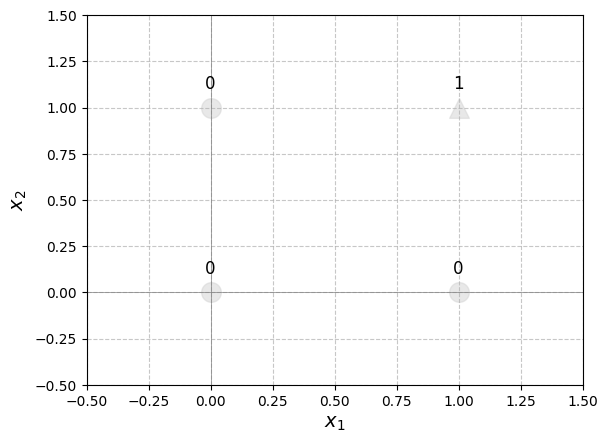

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Define the truth table values for x1, x2, and output y
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
y = [0, 0, 0, 1]  # Example for AND logic gate

# Define colors and markers for visualization
colors = ['lightgray' for _ in y]
markers = ['o' if value == 0 else '^' for value in y]

# Create the plot
fig, ax = plt.subplots()
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

# Plot the points based on the truth table
for i in range(len(x1)):
    ax.scatter(x1[i], x2[i], c=colors[i], marker=markers[i], s=200, alpha=0.5)
    ax.text(x1[i], x2[i] + 0.1, str(y[i]), fontsize=12, ha='center')

# Set axis labels
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)
ax.grid(True, linestyle='--', alpha=0.7)


# Add the line representing 0.5 * x1 + 0.5 * x2 = 0.7
# x_vals = np.linspace(-0.5, 1.5, 400)
# y_vals = (0.7 - 0.5 * x_vals) / 0.5
# ax.plot(x_vals, y_vals, color='red', linewidth=2, label='$0.5x_1 + 0.5x_2 = 0.7$')
# ax.legend()

plt.show()


###### 2.1.3 人工找一组参数满足AND门要求

$(w_1, w_2, \theta) = (0.5, 0.5, 0.7)$ 即可满足要求，解除注释可看到对应的可视化

##### 2.2、与非门


###### 2.2.1 真值表

> 全1则0

| $x_1$  | $x_2$ |  $y$ |
| ------ | ----- | -----|
| 0      |   0   |   1  |
| 1      |   0   |   1  |
| 0      |   1   |   1  |
| 1      |   1   |   0  |

###### 2.2.2 人工找一组参数满足NAND门要求

$(w_1, w_2, \theta) = (-0.5, -0.5, -0.7)$ 即可满足要求



##### 2.3、或门

###### 2.3.1、真值表

> 全0则0 

| $x_1$  | $x_2$ |  $y$ |
| ------ | ----- | -----|
| 0      |   0   |   0  |
| 1      |   0   |   1  |
| 0      |   1   |   1  |
| 1      |   1   |   1  |

###### 2.3.2、人工找一组参数满足OR门

$(w_1, w_2, \theta) = (0.5, 0.5, -0.2)$ 即可满足要求

##### 2.4、从感知机领悟机器学习三要素

- 真值表    ==》训练数据
- 感知机函数 ==》模型
- 人工考虑   ==》机器学习算法，学习的过程就是在一步步算法迭代中找到参数值的过程！

#### 3、Python怎么通过感知机模型实现简单逻辑电路？

###### 3.1、阈值到偏置的演进过程

$$
y = \begin{cases}
 0 & (w_1x_1 + w_2x_2 \le {\color{Orange} \theta} ) \\
 1 & (w_1x_1 + w_2x_2 > {\color{Orange} \theta} )
\end{cases}  

\Longleftrightarrow 

y = \begin{cases}
 0 & ({\color{Green} b}  + w_1x_1 + w_2x_2 \le 0) \\
 1 & ({\color{Green} b}  + w_1x_1 + w_2x_2 > 0)
\end{cases} 
$$

###### 3.2、权重与偏置的本质

- 权重$w$： 输入加权
- 偏置$b$： 穿木屐

###### 3.3、Python代码实现简单感知机模型

In [24]:
import numpy as np

# AND
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7

    tmp = np.sum(w*x) + b

    if tmp <= 0:
        return 0
    else:
        return 1
    
# NAND
def NAND(x1, x2):
    x = np.array([x1, x2])
    w, b = np.array([-0.5, -0.5]), 0.7

    tmp = np.sum(w*x) + b

    if tmp <= 0:
        return 0
    else:
        return 1
    

# OR
def OR(x1, x2):
    x, w, b = np.array([x1, x2]), np.array([0.5, 0.5]), -0.2

    tmp = np.sum(w*x) + b

    if tmp <= 0:
        return 0
    else:
        return 1
    

res_and = AND(1, 1)
res_nand = NAND(1, 1)
res_or = OR(1, 1)
print(res_and, res_nand, res_or)

1 0 1


#### 4、单层感知机的局限性

##### 4.1、单层感知机的局限性在何处？

###### 4.1.1、异或门

> 相同为0不同为1


| $x_1$  | $x_2$ |  $y$ |
| ------ | ----- | -----|
| 0      |   0   |   0  |
| 1      |   0   |   1  |
| 0      |   1   |   1  |
| 1      |   1   |   0  |

###### 4.1.2、单层感知机无法表示异或门

因为单层感知机等价于一个线性函数，即一条直线，你自己看图即知

###### 4.2、什么是线性？什么是非线性？

- 线性：形如$y = w_1 x_1 + w_2 x_2 + \cdots + b$的函数，其在二维空间中的几何图像是**直线**
- 非线性：非线性是指不能用直线表示的函数。这些函数的图像是曲线

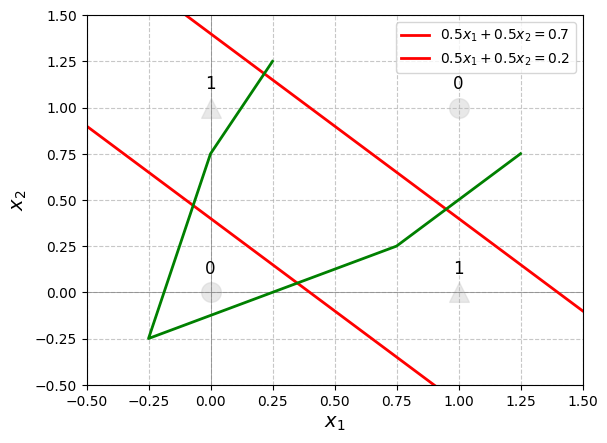

In [35]:
# 所以很多教程是错的，多层感知机解决XOR问题并不是实现了一条曲线，而是两条直线划分，效果上看似乎是曲线效果

import matplotlib.pyplot as plt
import numpy as np

# Define the truth table values for x1, x2, and output y
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
y = [0, 1, 1, 0]  # Example for XOR logic gate

# Define colors and markers for visualization
colors = ['lightgray' for _ in y]
markers = ['o' if value == 0 else '^' for value in y]

# Create the plot
fig, ax = plt.subplots()
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

# Plot the points based on the truth table
for i in range(len(x1)):
    ax.scatter(x1[i], x2[i], c=colors[i], marker=markers[i], s=200, alpha=0.5)
    ax.text(x1[i], x2[i] + 0.1, str(y[i]), fontsize=12, ha='center')

# Set axis labels
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)
ax.grid(True, linestyle='--', alpha=0.7)


# Add the line representing 0.5 * x1 + 0.5 * x2 = 0.7 0.5 * x1 + 0.5 * x2 = -0.2
x_vals_1 = np.linspace(-0.5, 1.5, 400)
y_vals_1 = (0.7 - 0.5 * x_vals_1) / 0.5
ax.plot(x_vals_1, y_vals_1, color='red', linewidth=2, label='$0.5x_1 + 0.5x_2 = 0.7$')
ax.legend()


x_vals_2 = np.linspace(-0.5, 1.5, 400)
y_vals_2 = (0.2 - 0.5 * x_vals_1) / 0.5
ax.plot(x_vals_2, y_vals_2, color='red', linewidth=2, label='$0.5x_1 + 0.5x_2 = 0.2$')
ax.legend()

# Add a custom curve for XOR decision boundary using specified points
curve_points_x = [0.25, 0, -0.25, 0.75, 1.25]
curve_points_y = [1.25, 0.75, -0.25, 0.25, 0.75]
ax.plot(curve_points_x, curve_points_y, color='green', linewidth=2)


plt.show()


#### 5、多层感知机

###### 5.1、为什么多层感知机可以表示异或？

如果你清楚为什么单层不能表示异或，就知道为什么多层可以表示异或了，两条直线就行！

不过组合与门、与非门、或门的思路要看下

![AND、NADN、OR门的符号](./attachements/与门、与非门、或门的符号.png)
![AND、NADN、OR门的符号](./attachements/把与们、与非们、或门代入组合门中.png)
![AND、NADN、OR门的符号](./attachements/通过组合与门、与非门、或门实现异或门.png)

| $x_1$  | $x_2$ |  $s_1$ | $s_2$ | $y$ |
| ------ | ----- | -----  |----- | -----|
| 0      |   0   |   1    |  0   |   0  |
| 1      |   0   |   1    |  1   |   1  |
| 0      |   1   |   1    |  1   |   1  |
| 1      |   1   |   0    |  1   |   0  |

In [26]:
# 其实上图出来代码就非常好写，不过怎么想出这种组合的需要脑子

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

XOR(1, 1)

0

###### 5.2、叠加层（深层）的本质是多条线组合吗？

YES！

#### 6、组合多个与非门就能构建一个计算机你信吗？

母鸡，BUT 感知机通过叠加层能够进行非线性的表示，理论上还可以构建计算机！